# Dataset : Mall Customers Dataset

**Implementing K-Means Clustering on Customer Segments**

**Task: 1**
- Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. Visualize the resulting clusters.
- Optimal Number of Clusters: Elbow Method and Silhouette Score

**Task: 2**
- Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset. Discuss the criteria for selecting the number of clusters.
- Cluster Profiling and Insights

**Task: 3**
- Analyze the characteristics of the clusters formed in the Mall Customers dataset. Provide insights into the customer segments based on their spending behavior and income levels.
- Hierarchical Clustering for Customer Segmentation

**Task: 4**

- Implement hierarchical clustering on the Mall Customers dataset. Compare the clusters formed with those obtained from K-Means and discuss the differences.
- Visualizing Clusters with PCA

**Task: 5**
- Apply PCA to the Mall Customers dataset to reduce its dimensionality. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets /BWF_Week7_Dataset/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Selecting the Column for Clustering**

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Applying K-Means Clustering

## Elbow method
The Elbow Method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and finding the "elbow point" where the decrease in WCSS slows down.

In [6]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

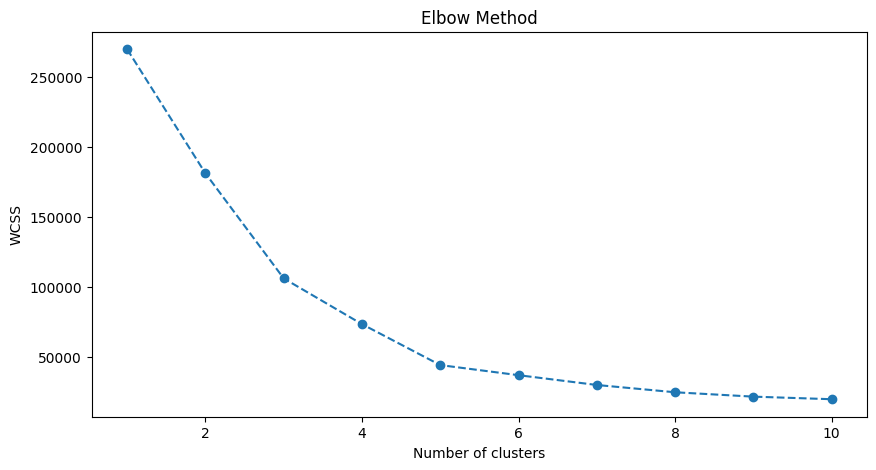

In [7]:
# plotting the Elbow method graph

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Silhouette Score

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

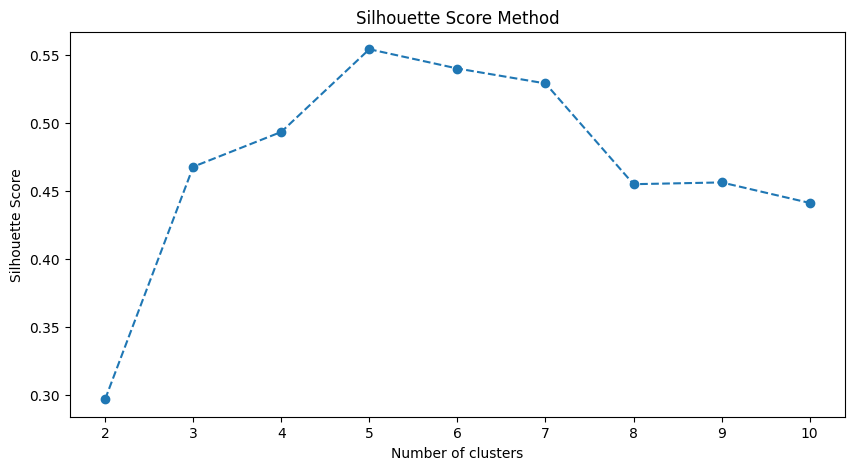

In [9]:
#plotting the Silhouette Score graph

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Cluster Profiling and Insights

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


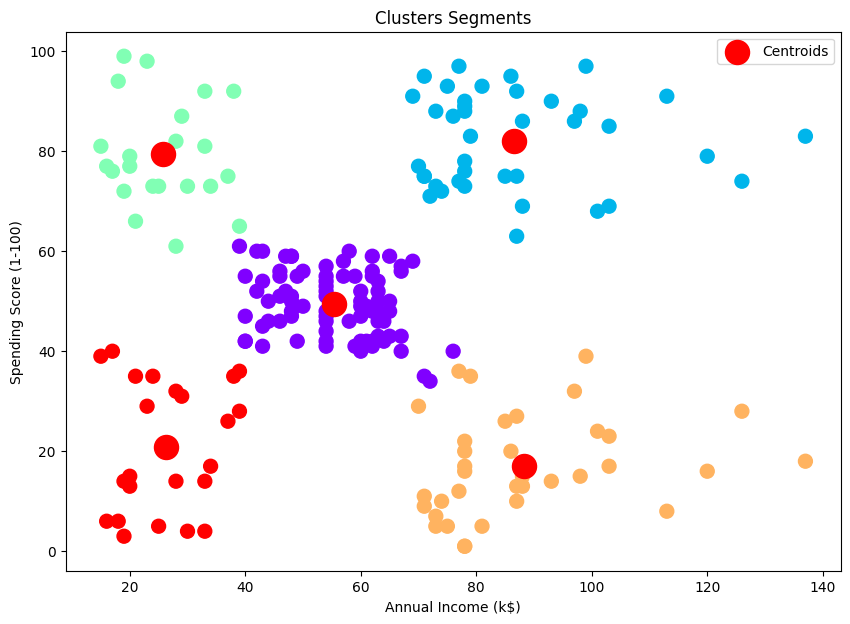

In [12]:
# Optimal Number of clusters

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


# Visualizing the Clustering

plt.figure(figsize=(10,7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans,s=100, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
plt.title('Clusters Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [18]:
# adding cluster labels to the original dataset

df['Cluster'] = y_kmeans

# diplayiing cluster centers
centroids = kmeans.cluster_centers_
print("Cluster Centers:")
print(centroids)

# summary statistics for each clusters

cluster_profile = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})
print("\nCluster Profile:")
print(cluster_profile)

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]

Cluster Profile:
        Annual Income (k$)          Spending Score (1-100)        
                      mean min  max                   mean min max
Cluster                                                           
0                55.296296  39   76              49.518519  34  61
1                86.538462  69  137              82.128205  63  97
2                25.727273  15   39              79.363636  61  99
3                88.200000  70  137              17.114286   1  39
4                26.304348  15   39              20.913043   3  40


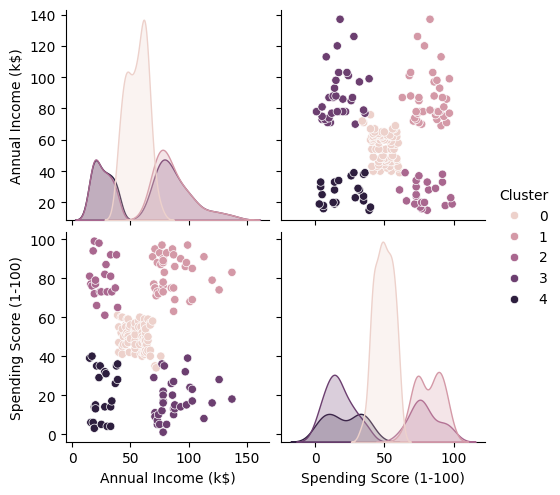

In [19]:
sns.pairplot(df, hue='Cluster', vars=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

# Insights into Customer Segments

- **Cluster 0:**

    - This cluster represents customers with moderate income and moderate spending behavior.

- **Cluster 1:**

    - This cluster represents high-income customers with high spending scores.

- **Cluster 2:**

    - This cluster represents low-income customers with high spending scores.

- **Cluster 3:**

    - This cluster represents high-income customers with low spending scores.

- **Cluster 4:**

    - This cluster represents low-income customers with low spending scores.

# Task 3: Hierarchical Clustering for Customer Segmentation

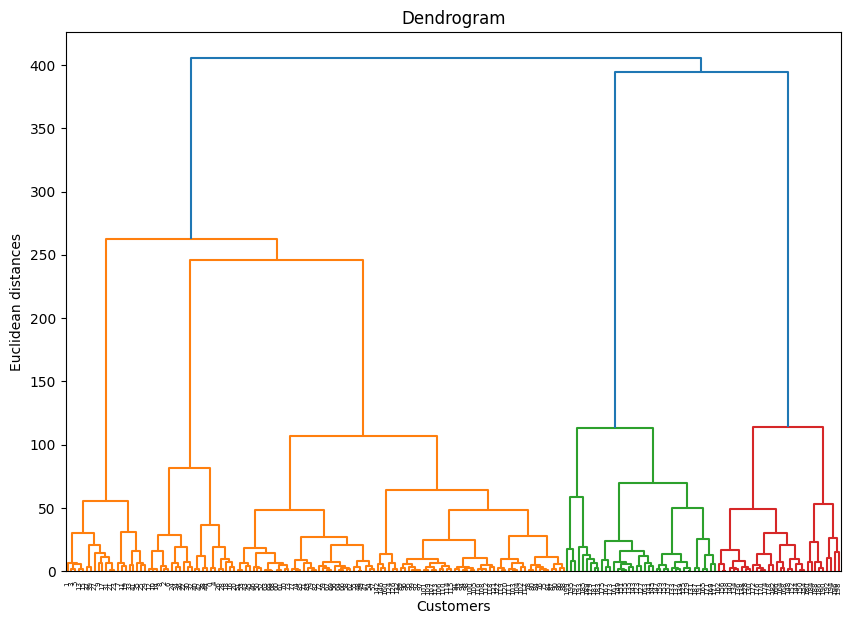

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# Dendrogram to find the optimal number of clusters

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


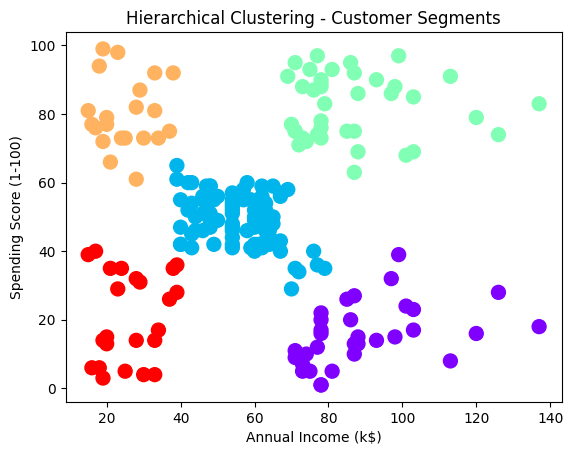

In [21]:
# fit the agglomerative clustering model

hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)


# adding the cluster labels to the original dataset
df['Hcluster'] = y_hc

# visualizing the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_hc, s=100, cmap='rainbow')
plt.title('Hierarchical Clustering - Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [25]:
# Summary statistics for each hierarchical cluster
h_cluster_profile = df.groupby('Hcluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})
print("\nHierarchical Cluster Profiling:")
print(h_cluster_profile)


Hierarchical Cluster Profiling:
         Annual Income (k$)          Spending Score (1-100)        
                       mean min  max                   mean min max
Hcluster                                                           
0                 89.406250  71  137              15.593750   1  39
1                 55.811765  39   79              49.129412  29  65
2                 86.538462  69  137              82.128205  63  97
3                 25.095238  15   38              80.047619  61  99
4                 26.304348  15   39              20.913043   3  40
